<a href="https://colab.research.google.com/github/mohsenahmadi2003/cnn_ai/blob/main/jal2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch = 0 			 Train Loss = 0.8080105185508728   			 Train Accuracy = 0.24799999594688416 					 Validation Accuracy = 0.06700000166893005
Epoch = 1 			 Train Loss = 0.7887319326400757   			 Train Accuracy = 0.25999999046325684 					 Validation Accuracy = 0.0689999982714653
Epoch = 2 			 Train Loss = 0.7705509066581726   			 Train Accuracy = 0.2709999978542328 					 Validation Accuracy = 0.0729999989271164
Epoch = 3 			 Train Loss = 0.7529400587081909   			 Train Accuracy = 0.2840000092983246 					 Validation Accuracy = 0.07800000160932541
Epoch = 4 			 Train Loss = 0.7357276678085327   			 Train Accuracy = 0.296999990940094 					 Validation Accuracy = 0.08100000023841858
Epoch = 5 			 Train Loss = 0.7188675999641418   			 Train Accuracy = 0.31299999356269836 					 Validation Accuracy = 0.08299999684095383
Epoch = 6 			 Train Loss = 0.7023239135742188   			 Train Accuracy = 0.3330000042915344 					 Validation Accuracy = 0.0860000029206276
Epoch = 7 			 Train Loss = 0.6860847473144531   	

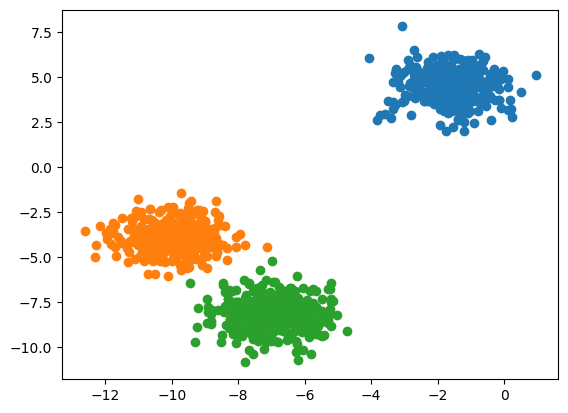

In [ ]:
import torch
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from numpy import where

num_features = 2
num_classes = 3
num_samples = 1000

#data, label                          #  تعداد کلاس ها | تعداد ویژگی ها
x, yt = make_blobs(n_samples=num_samples, n_features=num_features, 
                   centers=num_classes, cluster_std=0.86, random_state=1)
# plot
for class_value in range(3):
  row_idx = where(yt == class_value)
  pyplot.scatter(x[row_idx, 0], x[row_idx, 1])
# pyplot.show()


# Train / Validation, Test
x_train = torch.tensor(x[:int(0.6*num_samples), :]).float()
y_train = torch.tensor(yt[:int(0.6*num_samples)]).long()

x_vaild = torch.tensor(x[int(0.6*num_samples):int(0.75*num_samples), :]).float()
y_vaild = torch.tensor(yt[int(0.6*num_samples):int(0.75*num_samples)]).long()

x_test = torch.tensor(x[int(0.75*num_samples):, :]).float()
y_test = torch.tensor(yt[int(0.75*num_samples):]).long()



# tarin data
# x = torch.randn(100, 3)
# yt = torch.randn(100, 2) #lable

# cretae model :  2 layer and 3 noron
# model = torch.nn.Linear(num_features, num_classes)
# لایه ها را پشت سر هم گذاشتیم
model = torch.nn.Sequential(torch.nn.Linear(num_features, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, num_classes))


# Loss
# loss = torch.nn.MSELoss()
loss = torch.nn.CrossEntropyLoss()

# Optimization
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

# perdict
# train
num_epochs = 101
# x = torch.FloatTensor(x)
# yt = torch.LongTensor(yt)
for epoch in range(num_epochs):
  optimizer.zero_grad
  yp = model(x_train)
  loss_value = loss(yp, y_train)
  #                        هر سطر ماکسیمم را پیدا کن
  num_correct = torch.sum(torch.max(yp, 1)[1] == y_train)
                                        #  اندیس اگر صفر بود مقادیر رو بر میگرداند
  acc_train = num_correct.float() / float(num_samples)

  loss_value.backward()
  optimizer.step()


  yp = model(x_vaild)
  num_correct = torch.sum(torch.max(yp, 1)[1] == y_vaild)
  acc_valid = num_correct.float() / float(num_samples)
  print(f"Epoch = {epoch} \t\t\t Train Loss = {loss_value.item()} \
  \t\t\t Train Accuracy = {acc_train.item()} \t\t\t\t\t Validation Accuracy = {acc_valid.item()}")

yp = model(x_test)
num_correct = torch.sum(torch.max(yp, 1)[1] == y_test)
acc_valid = num_correct.float() / float(num_samples)
print(f"Epoch = {epoch} \t\t\t Train Loss = {loss_value.item()} \
\t\t\t Train Accuracy = {acc_train.item()} \t\t\t\t\t Validation Accuracy = {acc_valid.item()}")

